# 1. When Feature Engineering is Necessary

Feature engineering is a critical step in the data preprocessing pipeline for regression problems. It involves creating new features or transforming existing ones to improve the model's predictive performance. By extracting more meaningful information from the data, feature engineering can significantly enhance the model's ability to capture underlying patterns and relationships. Here are some practical examples and strategies for when and how feature engineering might be necessary:

## 1.1. Non-Linear Relationships

- **Problem:** Linear regression assumes a linear relationship between features and the target. If the relationship is non-linear, the model may not perform well.

- **Solution:** Transform features using non-linear functions (e.g., logarithms, squares, square roots) or create interaction terms to capture non-linear effects.

## 1.2. Categorical Variables

- **Problem:** Categorical variables need to be converted into numerical format for most regression algorithms to process them.

- **Solution:** Use techniques like one-hot encoding, ordinal encoding, or binary encoding to convert categorical variables into numeric form.

## 1.3. Time-Series Data

- **Problem:** Temporal patterns, trends, and seasonality are often present in time-series data, which can affect predictions.

- **Solution:** Create features like time lags, rolling averages, or extract components such as year, month, day, hour, and day of the week to capture temporal patterns.

## 1.4. Domain-Specific Knowledge

- **Problem:** Raw data might not fully capture relevant domain-specific insights or knowledge.

- **Solution:** Incorporate domain expertise to create features that better represent the underlying phenomena, such as ratios, differences, or composite indices.

## 1.5. High-Dimensional Data

- **Problem:** High-dimensional data can lead to overfitting and make model interpretation challenging.

- **Solution:** Use dimensionality reduction techniques like PCA to create new features or select the most relevant features through feature selection methods.

## 1.6. Missing Data

- **Problem:** Missing data can introduce bias or reduce the quality of the model.

- **Solution:** Engineer features to indicate the presence of missing values or impute missing values with meaningful estimates, such as mean, median, or mode.

# 2. Practical Examples of Feature Engineering

## 2.1. Polynomial Features

- **Example:** Suppose you have a dataset with a feature x and target y exhibiting a quadratic relationship. You can create a new feature x^2 to capture this non-linear effect.

Polynomial Regression MSE: 0.97


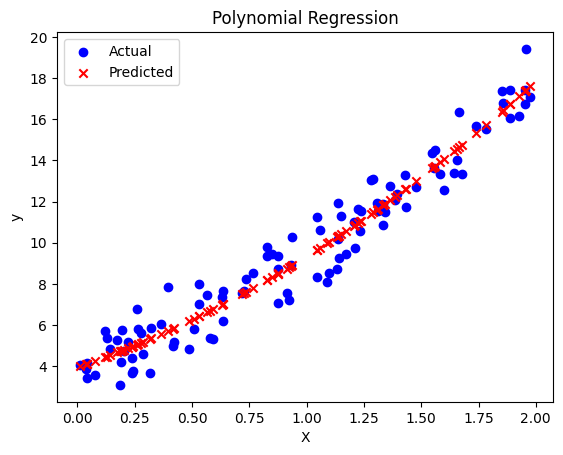

In [1]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + 2 * X**2 + np.random.randn(100, 1)

# Polynomial feature transformation
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Train linear regression with polynomial features
model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)

# Evaluate model performance
mse = mean_squared_error(y, y_pred)
print(f"Polynomial Regression MSE: {mse:.2f}")

# Plot the results
plt.scatter(X, y, color='blue', label='Actual')
plt.scatter(X, y_pred, color='red', marker='x', label='Predicted')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Polynomial Regression")
plt.legend()
plt.show()


## 2.2. One-Hot Encoding for Categorical Variables

- **Example:** Suppose you have a dataset with a categorical feature color with values `red`, `green`, and `blue`. You can use one-hot encoding to convert this feature into binary features.

In [3]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Sample data with a categorical feature
data = {'color': ['red', 'green', 'blue', 'green', 'red']}
df = pd.DataFrame(data)

# One-hot encode the categorical feature
encoder = OneHotEncoder(sparse_output=False)
color_encoded = encoder.fit_transform(df[['color']])

# Create a DataFrame with encoded features
df_encoded = pd.DataFrame(color_encoded, columns=encoder.get_feature_names_out(['color']))
print(df_encoded)


   color_blue  color_green  color_red
0         0.0          0.0        1.0
1         0.0          1.0        0.0
2         1.0          0.0        0.0
3         0.0          1.0        0.0
4         0.0          0.0        1.0


## 2.3. Lag Features for Time-Series Data

- **Example:** For a time-series dataset with daily sales data, you can create lag features to capture past trends.

In [4]:
import pandas as pd

# Sample time-series data
data = {'sales': [100, 150, 200, 250, 300, 350, 400]}
df = pd.DataFrame(data)

# Create lag features
df['lag_1'] = df['sales'].shift(1)
df['lag_2'] = df['sales'].shift(2)
df.dropna(inplace=True)  # Drop missing values from lagging

print(df)


   sales  lag_1  lag_2
2    200  150.0  100.0
3    250  200.0  150.0
4    300  250.0  200.0
5    350  300.0  250.0
6    400  350.0  300.0


## 2.4 Interaction Features

- **Example:** If you have features `age` and `income`, you can create an interaction feature age_income to capture the combined effect.

In [5]:
import numpy as np
import pandas as pd

# Sample data
data = {'age': [25, 30, 35], 'income': [50000, 60000, 70000]}
df = pd.DataFrame(data)

# Create an interaction feature
df['age_income'] = df['age'] * df['income']
print(df)


   age  income  age_income
0   25   50000     1250000
1   30   60000     1800000
2   35   70000     2450000
